In [2]:
import mne
import numpy as np
#import torch

<frozen importlib._bootstrap>:241: RuntimeWarning: The MNE-Python config file (/home/mattbls/.mne/mne-python.json) is not a valid JSON file and might be corrupted


In [6]:
raw = mne.io.read_raw_edf('CHB-MIT/chb01_01.edf')


Extracting EDF parameters from /home/mattbls/PythonProjects/SeizureSense/CHB-MIT/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_42577/2894582701.py:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('CHB-MIT/chb01_01.edf')


Effective window size : 8.000 (s)


c:\Users\uddha\miniconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


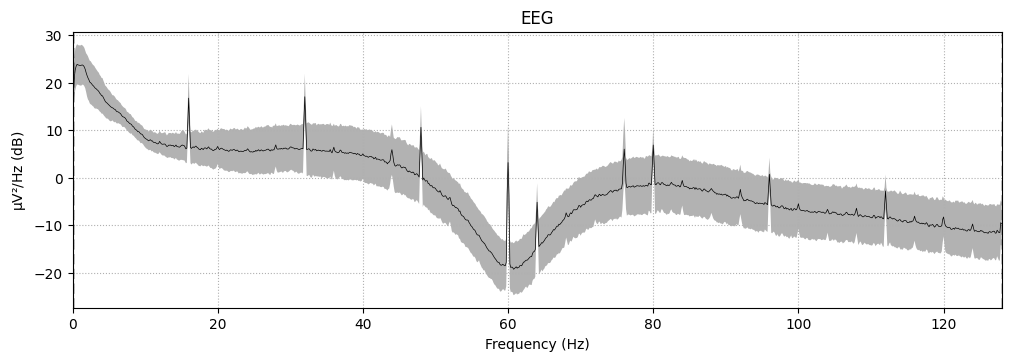

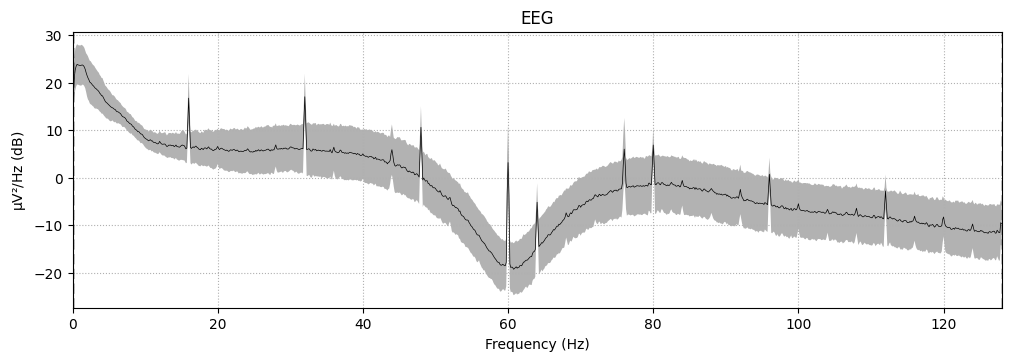

In [19]:
fig = raw.compute_psd(tmax=np.inf, fmax=128)
fig.plot(
    average=True, picks="data", exclude="bads")

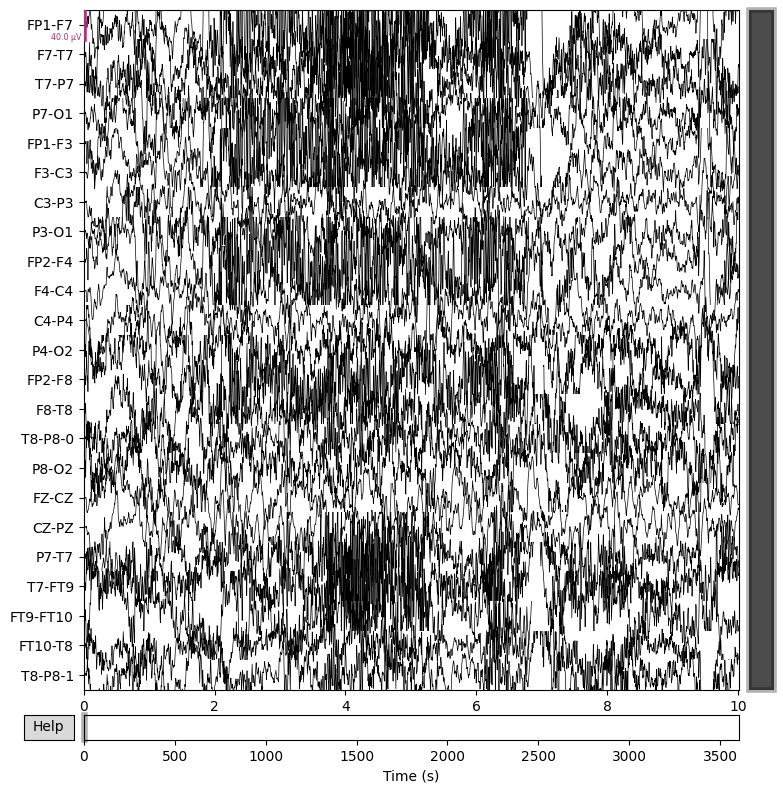

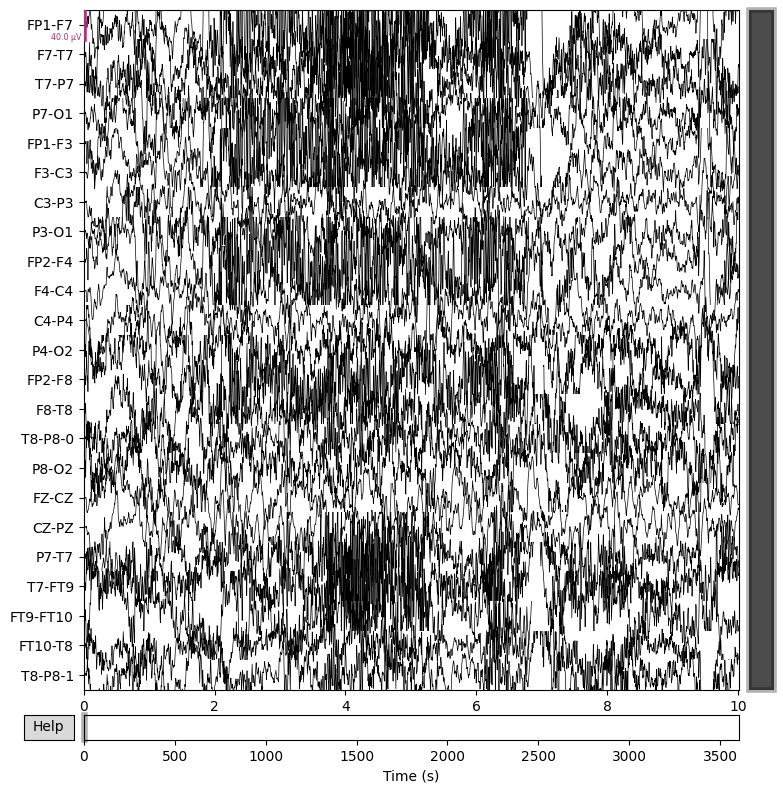

In [29]:
#
raw.plot(duration=10,proj=False, n_channels=len(raw.ch_names), remove_dc=False)

Using matplotlib as 2D backend.


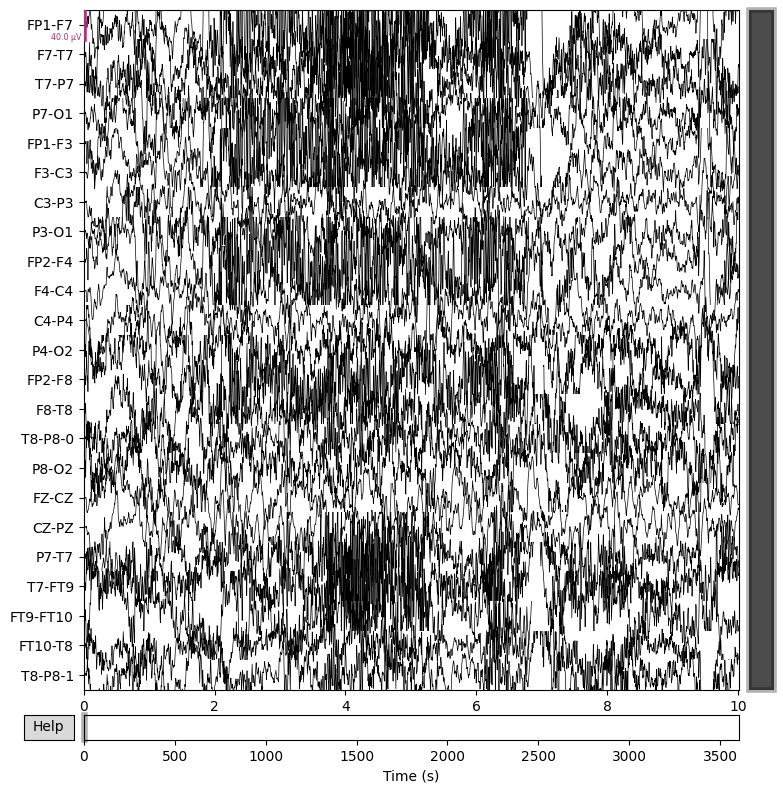

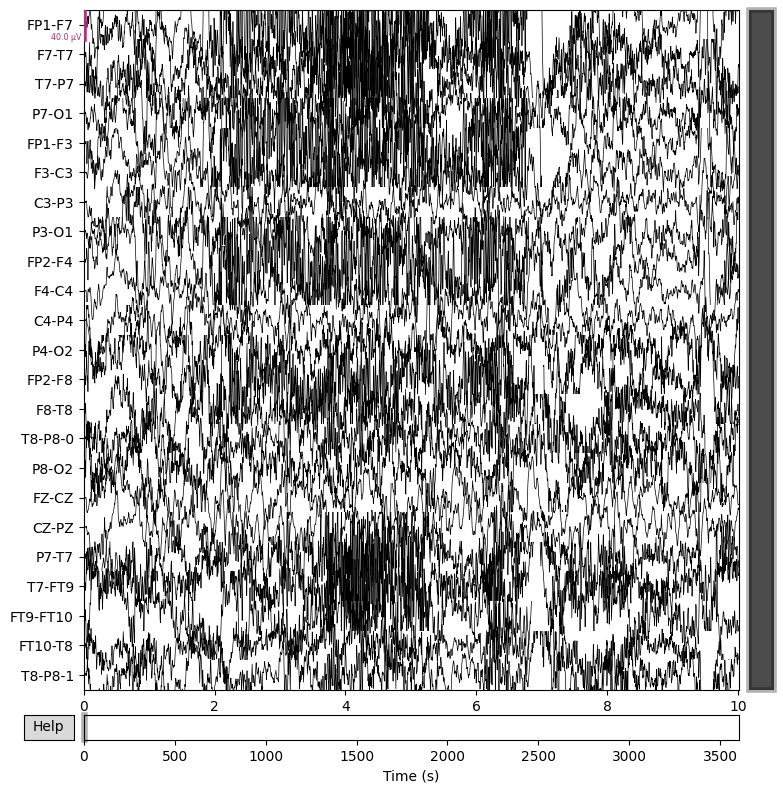

In [8]:
def add_arrows(axes):
    # add some arrows at 60 Hz and its harmonics
    for ax in axes:
        freqs = ax.lines[-1].get_xdata()
        psds = ax.lines[-1].get_ydata()
        for freq in (60, 120, 180, 240):
            idx = np.searchsorted(freqs, freq)
            # get ymax of a small region around the freq. of interest
            y = psds[(idx - 4) : (idx + 5)].max()
            ax.arrow(
                x=freqs[idx],
                y=y + 18,
                dx=0,
                dy=-12,
                color="red",
                width=0.1,
                head_width=3,
                length_includes_head=True,
            )


raw.plot(duration=10, proj=False, n_channels=len(raw.ch_names), remove_dc=False)

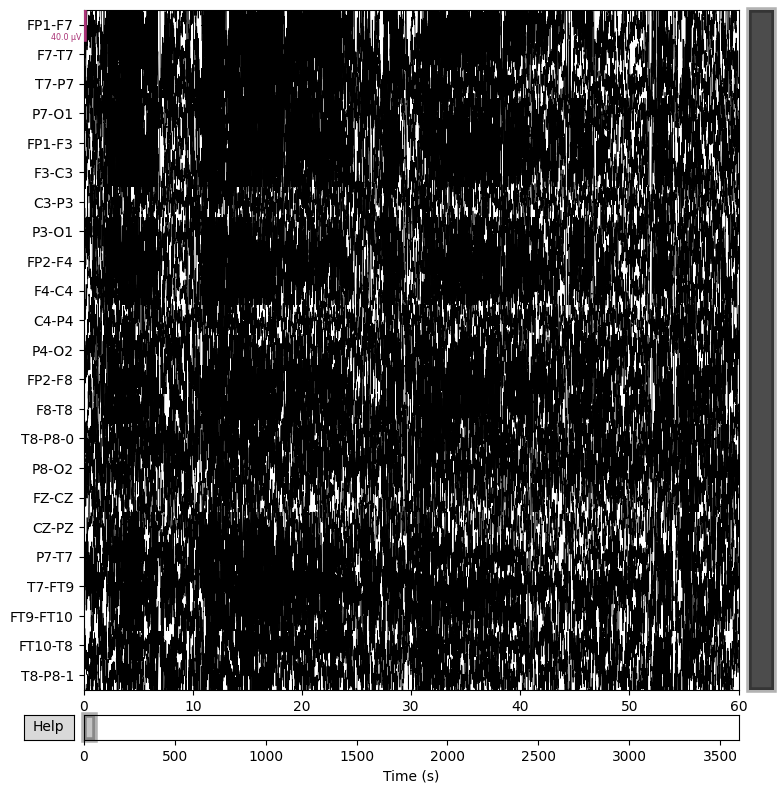

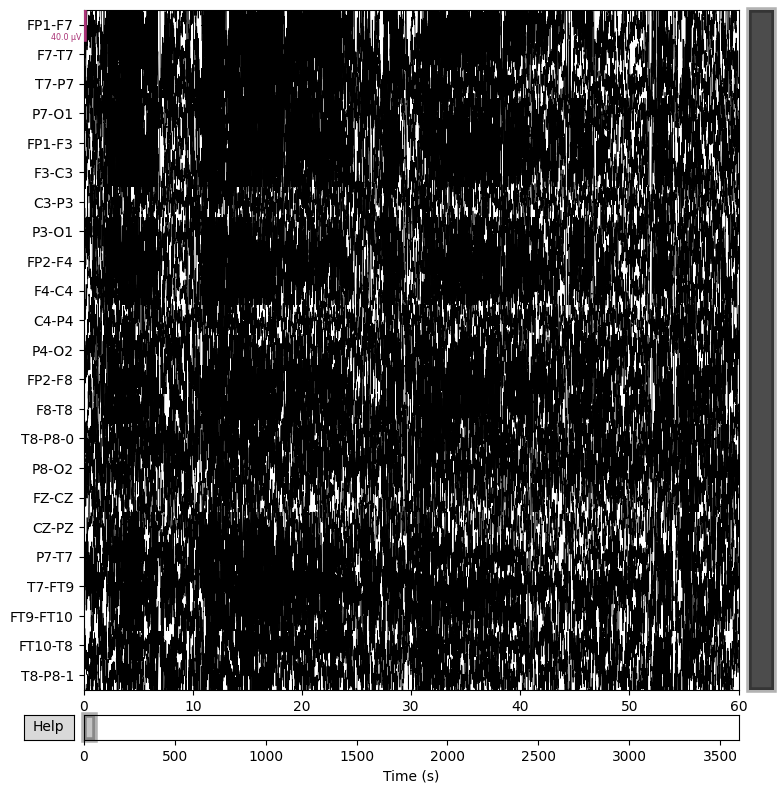

In [9]:
raw.plot(duration=60, proj=False, n_channels=len(raw.ch_names), remove_dc=False)

In [10]:
print(raw.info)
raw.load_data()


<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-06 11:42:54 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


Measurement date,"November 06, 2076 11:42:54 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,23 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


In [11]:
#filtering 60 hz out with notch filtering

#original problem is that we dont have meg stuff so we need to change "meg=true" to smth else
#so i did this shit
eeg_picks = mne.pick_types(raw.info, meg=False, eeg=True)


freqs = (60,120)
raw_notch = raw.copy().notch_filter(freqs=freqs, picks=eeg_picks)



Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


In [12]:
raw_notch.get_data()

array([[-1.45934066e-04, -3.47830137e-07,  1.52266967e-07, ...,
        -1.17117888e-05, -3.88229008e-06,  1.93406593e-05],
       [-1.04517705e-04, -1.43302979e-06,  2.85894856e-08, ...,
         2.38238939e-05,  2.82499721e-05,  3.06715507e-05],
       [-4.27838828e-05,  1.77732578e-07,  1.79628674e-07, ...,
         4.85596421e-05,  4.48685210e-05,  3.45787546e-05],
       ...,
       [-2.64713065e-04, -2.17447389e-06,  1.62361425e-07, ...,
         1.09663246e-06, -1.52890620e-05, -2.94993895e-05],
       [ 9.47496947e-05,  4.03817241e-07,  2.47563284e-07, ...,
        -7.21186435e-06, -1.00980654e-05, -1.34798535e-05],
       [ 4.47374847e-05, -2.70823207e-07,  3.03762063e-09, ...,
         1.70751580e-05,  2.28271683e-05,  2.63736264e-05]])

In [35]:
for title, data in zip(["Un", "Notch "], [raw, raw_notch]):
    title="Filter with notch"
    fig = data.compute_psd(fmax=128).plot(average=True, picks="data", exclude="bads")
    fig.suptitle(f"{title}filtered", size="xx-large", weight="bold")
    

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)


c:\Users\uddha\miniconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
c:\Users\uddha\miniconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


In [29]:
fig.savefig("Uddhavs Attempt at filtering")



In [32]:
raw.info['sfreq']

256.0